In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import missingno as msno
from plotly.offline import init_notebook_mode, iplot
import statistics
import scipy.stats as stats
import plotly.graph_objs as go

# Importing Data

In [2]:
bankData = pd.read_csv("Assignment3-Marketing-Dataset.csv")

In [3]:
pd.concat([bankData.head(),bankData.tail()])

row ID  age          job  marital            education  default  \
0          Row0   56    housemaid  married             basic.4y       no   
1          Row1   56     services  married          high.school       no   
2          Row2   45     services  married             basic.9y  unknown   
3          Row3   59       admin.  married  professional.course       no   
4          Row4   41  blue-collar  married              unknown  unknown   
26355  Row26355   29   unemployed   single             basic.4y       no   
26356  Row26356   46  blue-collar  married  professional.course       no   
26357  Row26357   56      retired  married    university.degree       no   
26358  Row26358   44   technician  married  professional.course       no   
26359  Row26359   74      retired  married  professional.course       no   

      housing loan    contact month  ... campaign  pdays  previous  \
0          no   no  telephone   may  ...        1    999         0   
1          no  yes  telephone   may  ...        1    999         0   
2          no   no  telephone   may  ...        1    999         0   
3          no   no  telephone   may  ...        1    999         0   
4          no   no  telephone   may  ...        1    999         0   
26355     yes   no   cellular   nov  ...        1      9         1   
26356      no   no   cellular   nov  ...        1    999         0   
26357     yes   no   cellular   nov  ...        2    999         0   
26358      no   no   cellular   nov  ...        1    999         0   
26359     yes   no   cellular   nov  ...        3    999         1   

          poutcome  emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent           1.1         93.994          -36.4      4.857   
1      nonexistent           1.1         93.994          -36.4      4.857   
2      nonexistent           1.1         93.994          -36.4      4.857   
3      nonexistent           1.1         93.994          -36.4      4.857   
4      nonexistent           1.1         93.994          -36.4      4.857   
26355      success          -1.1         94.767          -50.8      1.028   
26356  nonexistent          -1.1         94.767          -50.8      1.028   
26357  nonexistent          -1.1         94.767          -50.8      1.028   
26358  nonexistent          -1.1         94.767          -50.8      1.028   
26359      failure          -1.1         94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[10 rows x 22 columns]

In [4]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   default         26360 non-null  object 
 6   housing         26360 non-null  object 
 7   loan            26360 non-null  object 
 8   contact         26360 non-null  object 
 9   month           26360 non-null  object 
 10  day_of_week     26360 non-null  object 
 11  duration        26360 non-null  int64  
 12  campaign        26360 non-null  int64  
 13  pdays           26360 non-null  int64  
 14  previous        26360 non-null  int64  
 15  poutcome        26360 non-null  object 
 16  emp.var.rate    26360 non-null  float64
 17  cons.price.idx  26360 non-null 

# Dealing Missing Value

In [5]:
bankData.replace(['unknown'], pd.NA, inplace=True)

In [6]:
bankData.isnull().sum()

row ID               0
age                  0
job                212
marital             51
education         1080
default           5551
housing            647
loan               647
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
dtype: int64

In [7]:
bankData.isnull().mean() * 100

row ID             0.000000
age                0.000000
job                0.804249
marital            0.193475
education          4.097117
default           21.058422
housing            2.454476
loan               2.454476
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
subscribed         0.000000
dtype: float64

In [8]:
# dropping 'default' attribute as it has 20% of missing values
bankData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
bankData[missing_categorical] = imputer.fit_transform(bankData[missing_categorical])
bankData

row ID  age          job  marital            education housing loan  \
0          Row0   56    housemaid  married             basic.4y      no   no   
1          Row1   56     services  married          high.school      no  yes   
2          Row2   45     services  married             basic.9y      no   no   
3          Row3   59       admin.  married  professional.course      no   no   
4          Row4   41  blue-collar  married    university.degree      no   no   
...         ...  ...          ...      ...                  ...     ...  ...   
26355  Row26355   29   unemployed   single             basic.4y     yes   no   
26356  Row26356   46  blue-collar  married  professional.course      no   no   
26357  Row26357   56      retired  married    university.degree     yes   no   
26358  Row26358   44   technician  married  professional.course      no   no   
26359  Row26359   74      retired  married  professional.course     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
26355   cellular   nov         fri  ...         1      9         1   
26356   cellular   nov         fri  ...         1    999         0   
26357   cellular   nov         fri  ...         2    999         0   
26358   cellular   nov         fri  ...         1    999         0   
26359   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
26355      success         -1.1          94.767          -50.8      1.028   
26356  nonexistent         -1.1          94.767          -50.8      1.028   
26357  nonexistent         -1.1          94.767          -50.8      1.028   
26358  nonexistent         -1.1          94.767          -50.8      1.028   
26359      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  subscribed  
0           5191.0           0  
1           5191.0           0  
2           5191.0           0  
3           5191.0           0  
4           5191.0           0  
...            ...         ...  
26355       4963.6           0  
26356       4963.6           0  
26357       4963.6           0  
26358       4963.6           1  
26359       4963.6           0  

[26360 rows x 21 columns]

<AxesSubplot:>

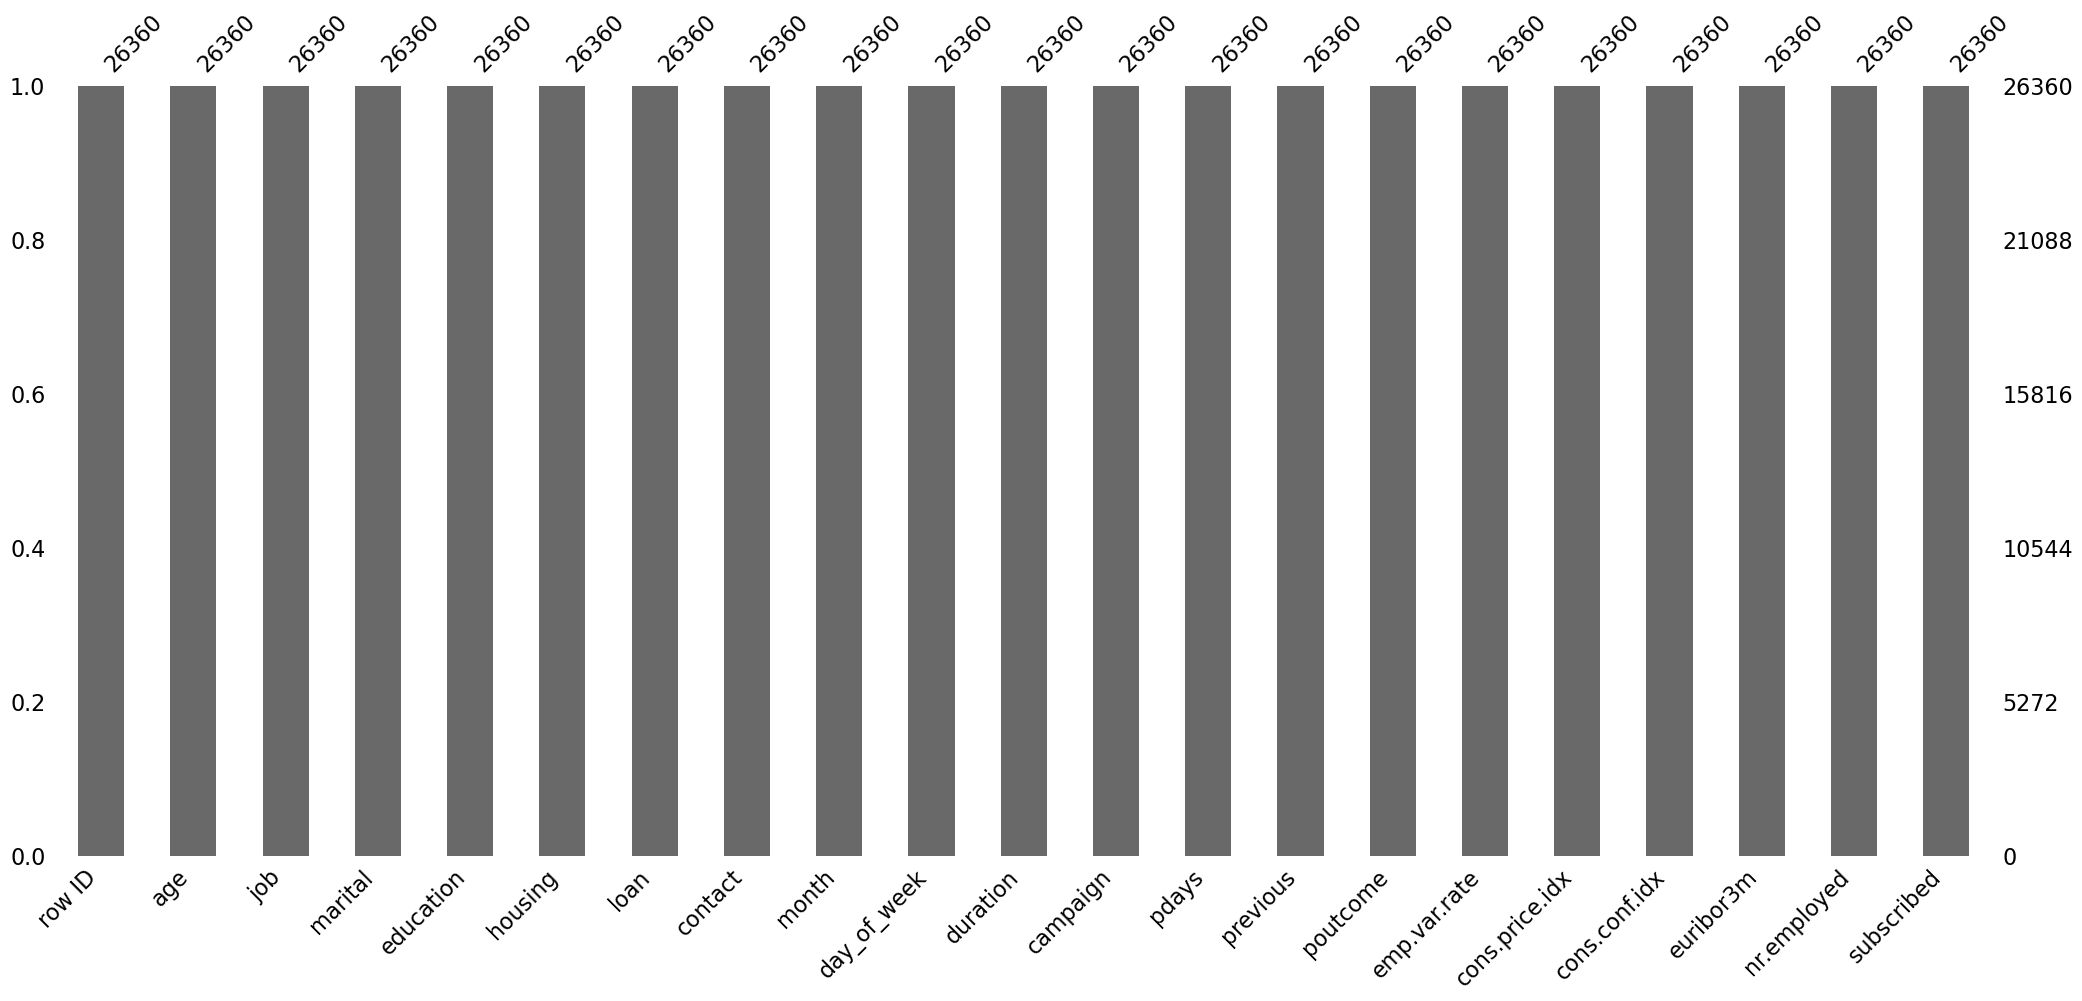

In [10]:
msno.bar(bankData)

In [11]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26360 entries, 0 to 26359
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row ID          26360 non-null  object 
 1   age             26360 non-null  int64  
 2   job             26360 non-null  object 
 3   marital         26360 non-null  object 
 4   education       26360 non-null  object 
 5   housing         26360 non-null  object 
 6   loan            26360 non-null  object 
 7   contact         26360 non-null  object 
 8   month           26360 non-null  object 
 9   day_of_week     26360 non-null  object 
 10  duration        26360 non-null  int64  
 11  campaign        26360 non-null  int64  
 12  pdays           26360 non-null  int64  
 13  previous        26360 non-null  int64  
 14  poutcome        26360 non-null  object 
 15  emp.var.rate    26360 non-null  float64
 16  cons.price.idx  26360 non-null  float64
 17  cons.conf.idx   26360 non-null 

## Data Exploration

In [12]:
bankData.describe()

age      duration      campaign         pdays      previous  \
count  26360.000000  26360.000000  26360.000000  26360.000000  26360.000000   
mean      40.055994    258.799317      2.556639    961.516161      0.173065   
std       10.452764    263.562218      2.715861    189.261156      0.490529   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    102.000000      1.000000    999.000000      0.000000   
50%       38.000000    179.000000      2.000000    999.000000      0.000000   
75%       47.000000    320.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  26360.000000    26360.000000   26360.000000  26360.000000   
mean       0.074848       93.570798     -40.490303      3.618071   
std        1.576832        0.578183       4.635120      1.735283   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.444000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed    subscribed  
count  26360.000000  26360.000000  
mean    5167.032845      0.112443  
std       72.089807      0.315917  
min     4963.600000      0.000000  
25%     5099.100000      0.000000  
50%     5191.000000      0.000000  
75%     5228.100000      0.000000  
max     5228.100000      1.000000

In [13]:
categorical_attribute = ['job','marital','education','housing','loan','contact','month','day_of_week','poutcome','subscribed']
numerical_attribute = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx'
                       ,'euribor3m','nr.employed']

In [14]:
for i in bankData[numerical_attribute] :
    print(bankData[i].value_counts(),'\n')

31    1258
32    1197
33    1179
36    1143
34    1112
      ... 
89       2
95       1
87       1
91       1
94       1
Name: age, Length: 78, dtype: int64 

136     122
72      114
85      114
96      113
90      112
       ... 
1056      1
1389      1
1019      1
1806      1
1868      1
Name: duration, Length: 1413, dtype: int64 

1     11243
2      6837
3      3416
4      1691
5      1014
6       627
7       384
8       272
9       189
10      157
11      112
12       74
13       66
15       38
14       35
17       33
16       30
18       19
20       19
21       12
23       11
19       11
22       11
27        8
24        8
29        7
26        6
28        5
31        4
30        4
25        3
35        3
33        3
32        2
40        2
34        2
42        1
56        1
Name: campaign, dtype: int64 

999    25365
3        296
6        267
4         80
2         43
9         41
7         39
12        37
10        33
5         26
13        25
11        18
15        18
1       

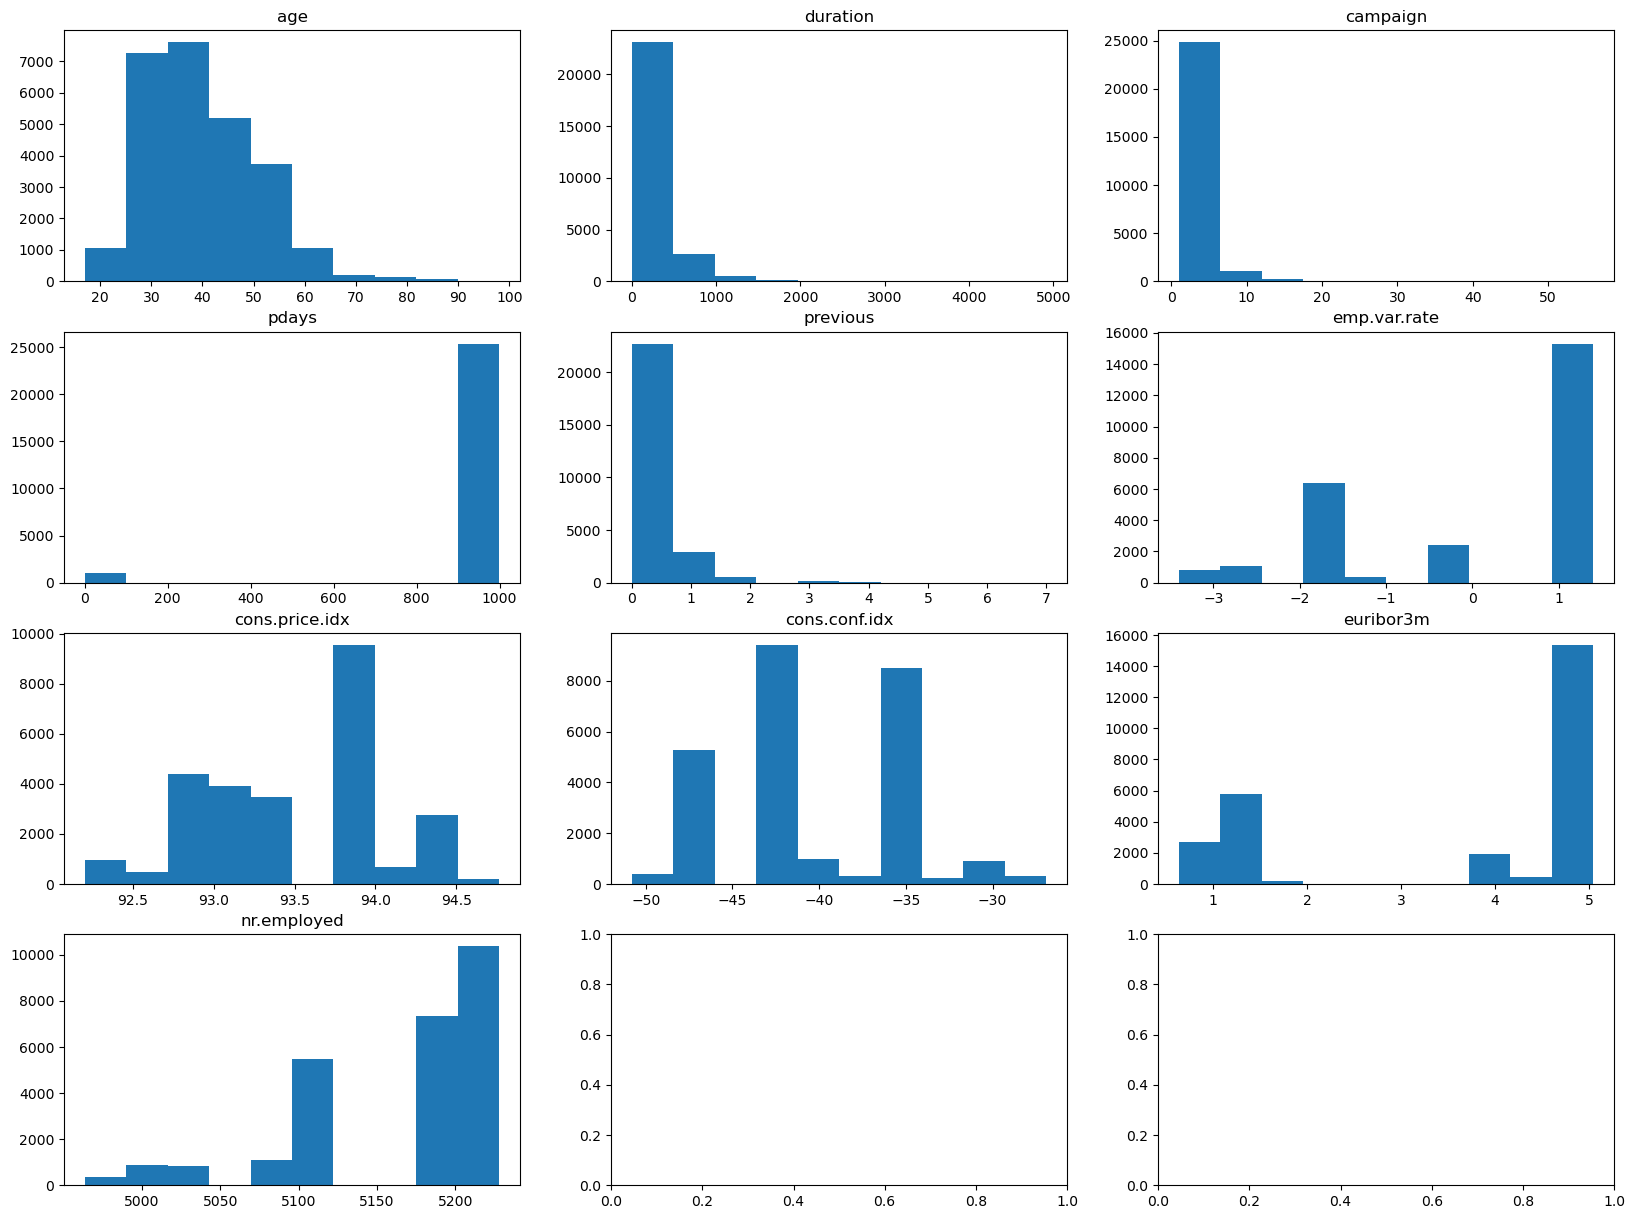

In [15]:
fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in numerical_attribute:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(bankData[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

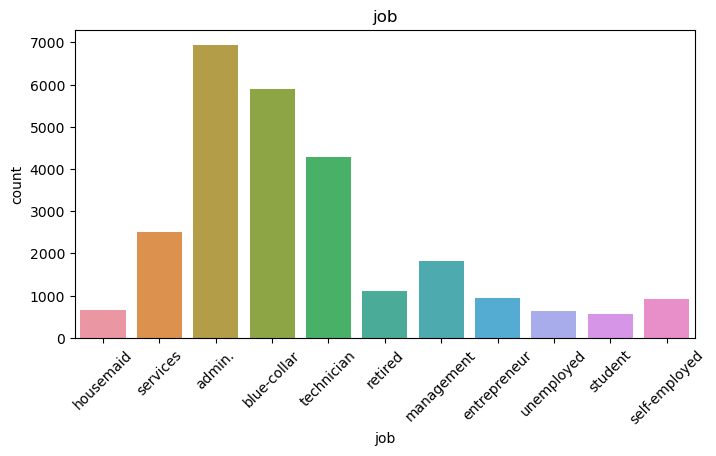

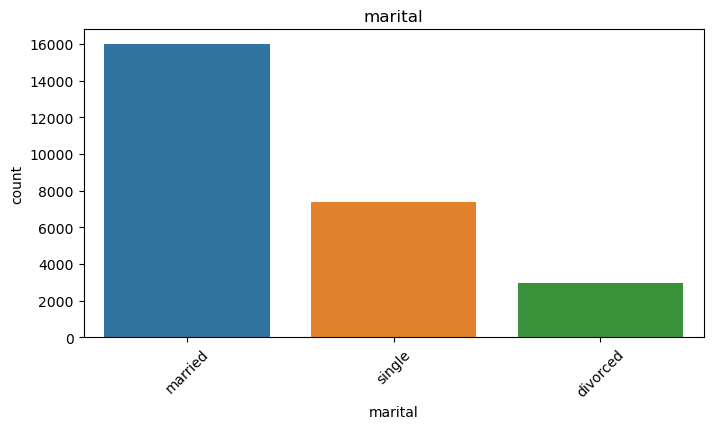

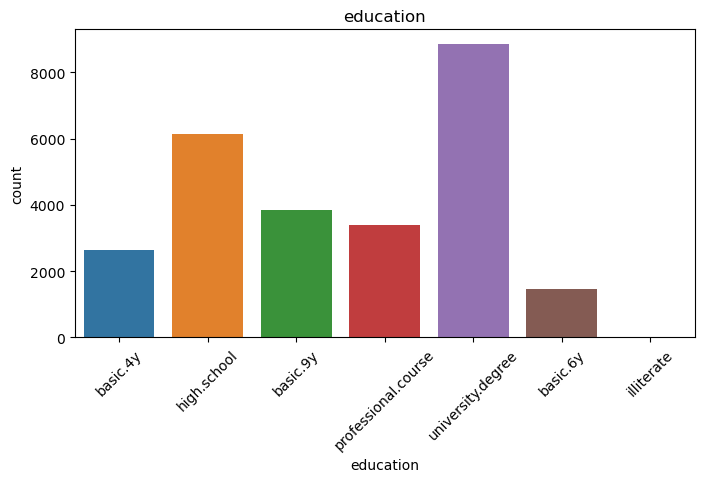

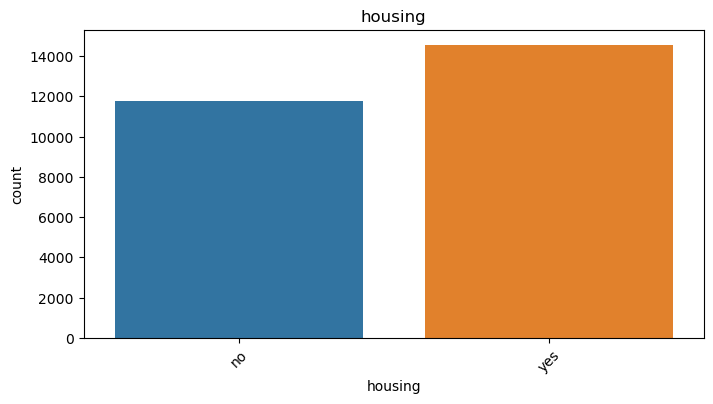

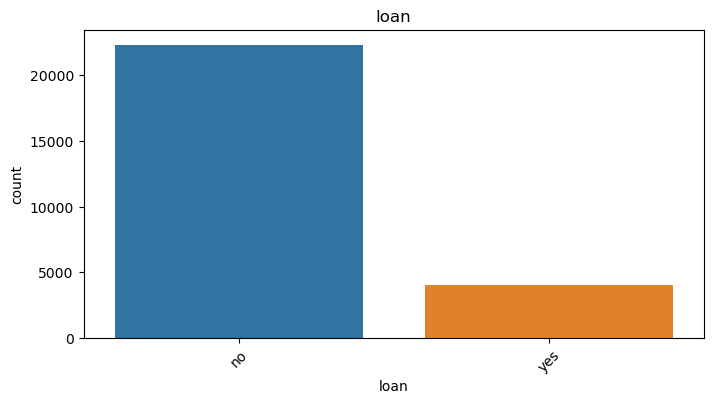

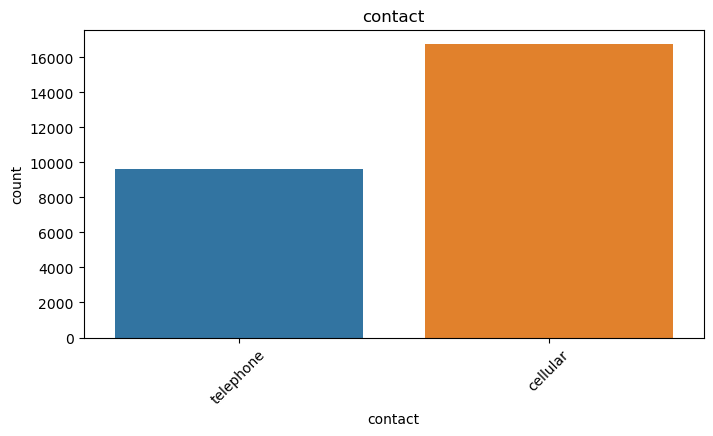

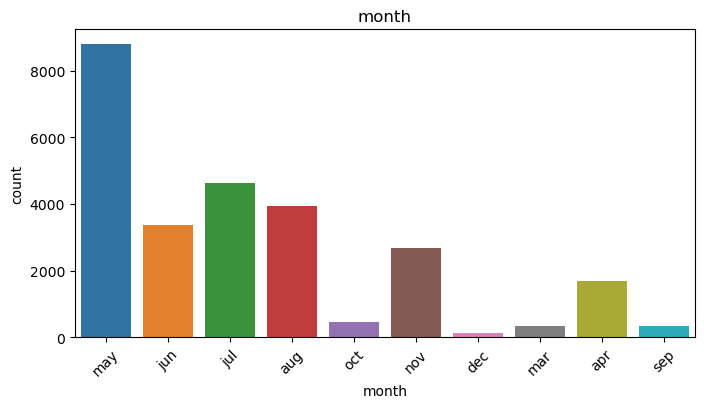

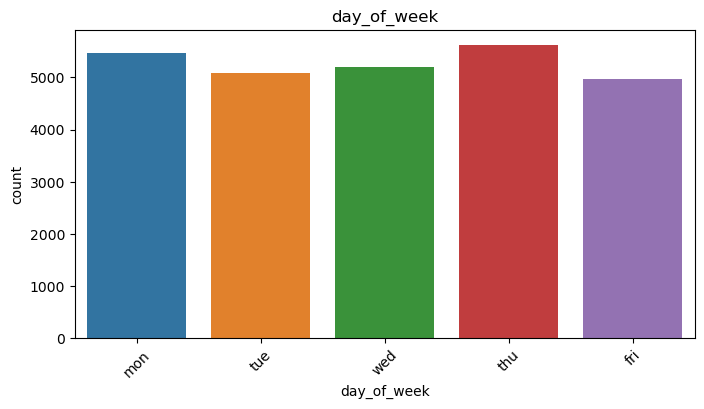

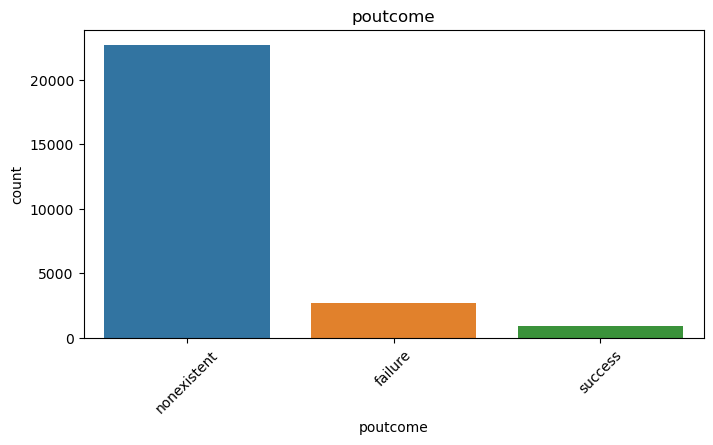

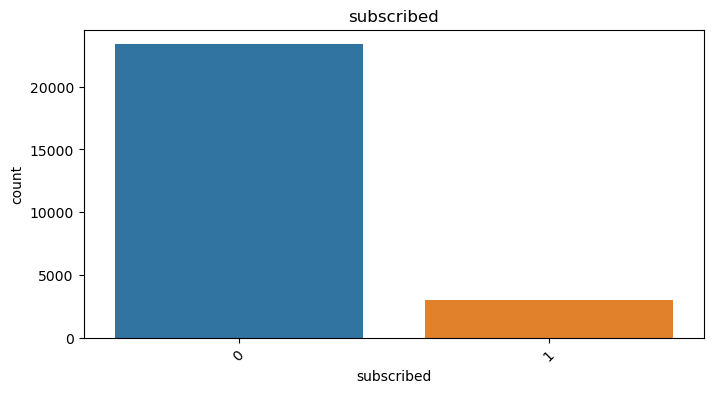

In [16]:
for col in categorical_attribute:
    plt.figure(figsize=(8,4))
    sns.countplot(x=bankData[col], data=bankData)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [17]:
for i in bankData[categorical_attribute] :
    print(bankData[i].value_counts(),'\n')

admin.           6951
blue-collar      5898
technician       4293
services         2519
management       1821
retired          1116
entrepreneur      945
self-employed     928
housemaid         668
unemployed        646
student           575
Name: job, dtype: int64 

married     15988
single       7399
divorced     2973
Name: marital, dtype: int64 

university.degree      8856
high.school            6143
basic.9y               3857
professional.course    3385
basic.4y               2633
basic.6y               1472
illiterate               14
Name: education, dtype: int64 

yes    14577
no     11783
Name: housing, dtype: int64 

no     22343
yes     4017
Name: loan, dtype: int64 

cellular     16750
telephone     9610
Name: contact, dtype: int64 

may    8797
jul    4631
aug    3930
jun    3381
nov    2668
apr    1676
oct     454
sep     353
mar     335
dec     135
Name: month, dtype: int64 

thu    5631
mon    5466
wed    5197
tue    5091
fri    4975
Name: day_of_week, dtype: int64 

n

0    23396
1     2964
Name: subscribed, dtype: int64


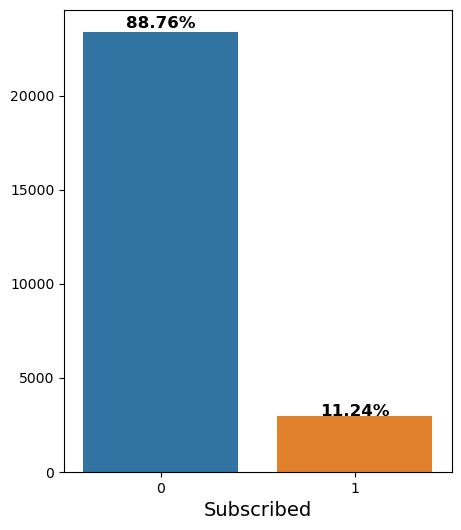

In [18]:
print(bankData["subscribed"].value_counts())
plt.figure(figsize=(5,6))
ax = sns.countplot(data = bankData, x = bankData.subscribed)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{round(height * 100 / bankData.shape[0], 2)}%', (x + width/2, y + height * 1.01), ha='center', weight = 'bold', fontsize = 12)
plt.xlabel(r'Subscribed', fontsize = 14)
plt.ylabel(r'')
plt.show()

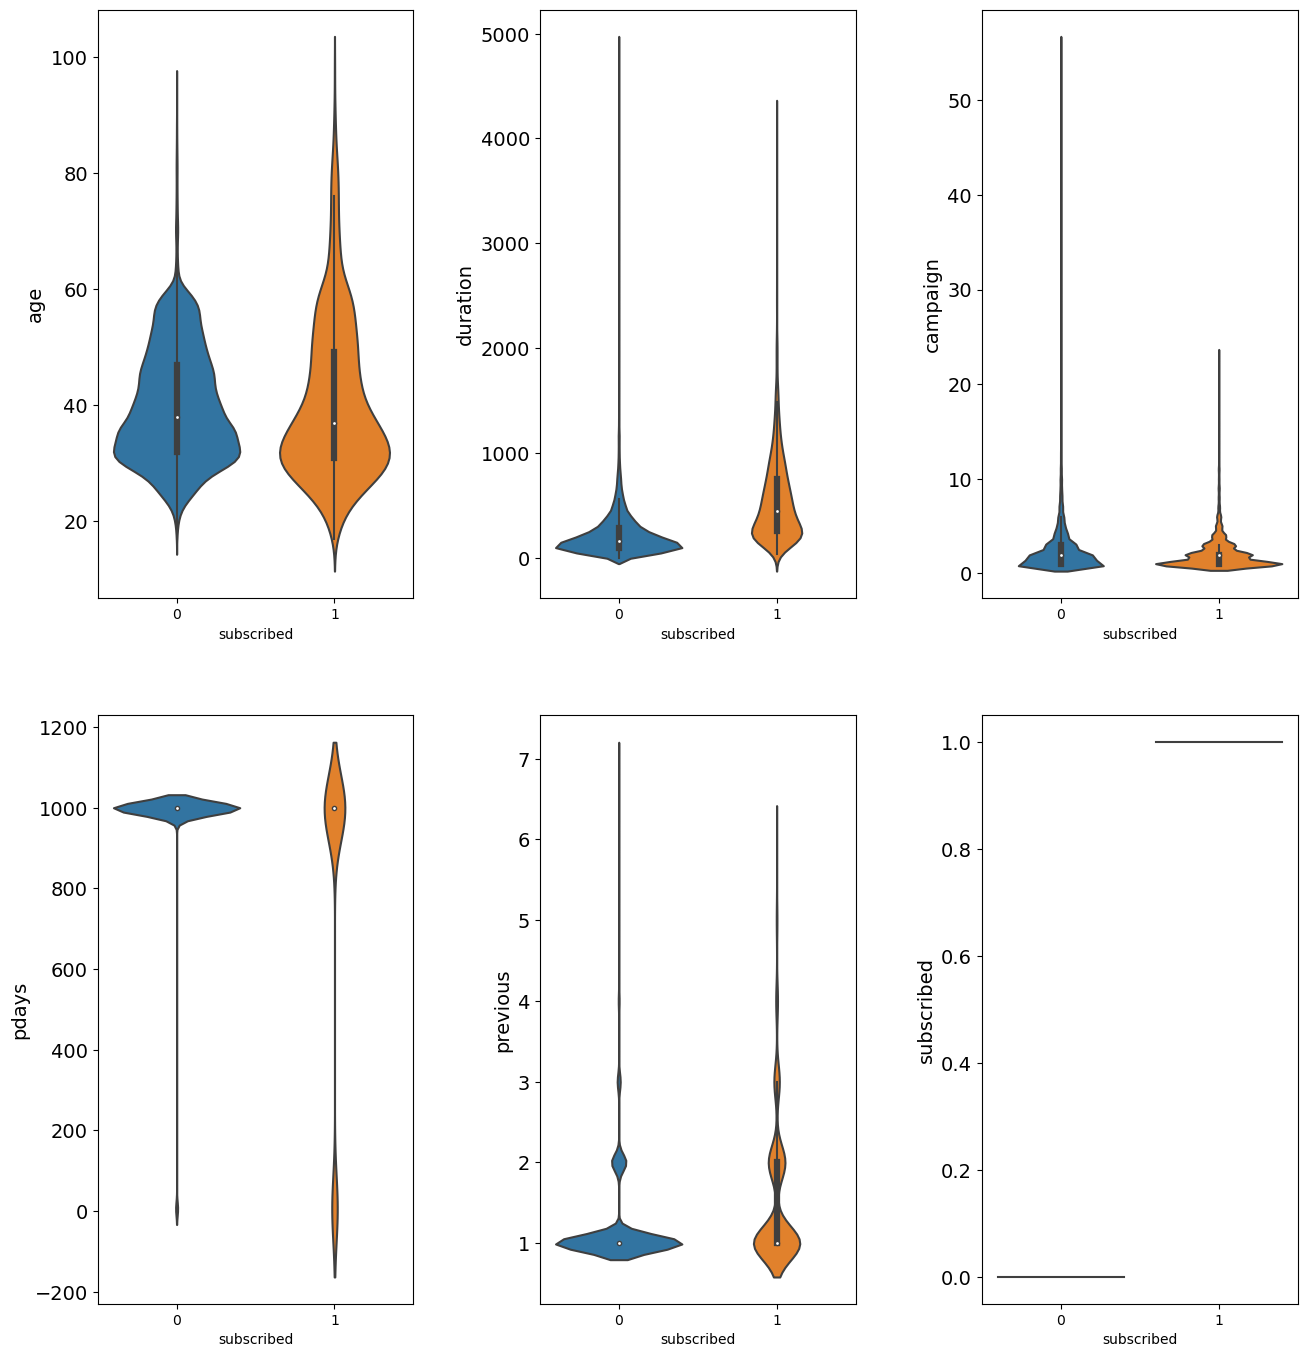

In [19]:
df_num = bankData.select_dtypes('int').columns
plt.figure(figsize = (15, 25))
for idx, col in enumerate(df_num):
    plt.subplot(3, 3, idx + 1)
    if col == 'pdays':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > -1][col], x = bankData.subscribed, inner = 'box')
    elif col == 'previous':
        ax = sns.violinplot(data = bankData, y = bankData[bankData[col] > 0][col], x = bankData.subscribed, inner = 'box')
    else:
        ax = sns.violinplot(data = bankData, y = bankData[col], x = bankData.subscribed)
    #plt.axhline(df[col].mean(), color='red', linewidth=3)
    #plt.axhline(df[col].median(), color='green', linewidth=3)
    plt.ylabel(col, fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.2)

In [20]:
c_df = pd.DataFrame()
c_df['age_yes'] = (bankData[bankData['subscribed'] == 1][['subscribed','age']].describe())['age']
c_df['age_no'] = (bankData[bankData['subscribed'] == 0][['subscribed','age']].describe())['age']

c_df

age_yes        age_no
count  2964.000000  23396.000000
mean     40.789811     39.963028
std      13.751986      9.953598
min      17.000000     17.000000
25%      31.000000     32.000000
50%      37.000000     38.000000
75%      49.250000     47.000000
max      98.000000     95.000000

In [21]:
pivotTable = pd.pivot_table(bankData, values='subscribed', index='job',
                    columns='education',aggfunc= 'sum')
pivotTable

education      basic.4y  basic.6y  basic.9y  high.school  illiterate  \
job                                                                    
admin.              9.0       6.0      28.0        254.0         0.0   
blue-collar        78.0      65.0     148.0         58.0         0.0   
entrepreneur        5.0       7.0       7.0         11.0         1.0   
housemaid          28.0       4.0       2.0          9.0         0.0   
management          3.0       5.0       8.0         12.0         NaN   
retired           112.0       6.0       9.0         40.0         2.0   
self-employed       2.0       1.0      13.0          5.0         1.0   
services            5.0      14.0      15.0        134.0         NaN   
student             3.0       6.0      17.0         80.0         NaN   
technician          4.0       3.0      30.0         56.0         NaN   
unemployed         12.0       3.0      15.0         24.0         NaN   

education      professional.course  university.degree  
job                                                    
admin.                        34.0              562.0  
blue-collar                   29.0               24.0  
entrepreneur                   5.0               44.0  
housemaid                      6.0               13.0  
management                     5.0              174.0  
retired                       36.0               58.0  
self-employed                 13.0               64.0  
services                      11.0               33.0  
student                       13.0               62.0  
technician                   218.0              157.0  
unemployed                    13.0               30.0

# Data preprocessing

In [22]:
bankData = bankData.drop('row ID', axis=1)
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [23]:
bankData

age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       56     services  married          high.school      no  yes  telephone   
2       45     services  married             basic.9y      no   no  telephone   
3       59       admin.  married  professional.course      no   no  telephone   
4       41  blue-collar  married    university.degree      no   no  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
26355   29   unemployed   single             basic.4y     yes   no   cellular   
26356   46  blue-collar  married  professional.course      no   no   cellular   
26357   56      retired  married    university.degree     yes   no   cellular   
26358   44   technician  married  professional.course      no   no   cellular   
26359   74      retired  married  professional.course     yes   no   cellular   

      month day_of_week  duration  campaign  pdays  previous     poutcome  \
0       may         mon       261         1    999         0  nonexistent   
1       may         mon       307         1    999         0  nonexistent   
2       may         mon       198         1    999         0  nonexistent   
3       may         mon       139         1    999         0  nonexistent   
4       may         mon       217         1    999         0  nonexistent   
...     ...         ...       ...       ...    ...       ...          ...   
26355   nov         fri       112         1      9         1      success   
26356   nov         fri       383         1    999         0  nonexistent   
26357   nov         fri       189         2    999         0  nonexistent   
26358   nov         fri       442         1    999         0  nonexistent   
26359   nov         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  \
0               1.1          93.994          -36.4      4.857       5191.0   
1               1.1          93.994          -36.4      4.857       5191.0   
2               1.1          93.994          -36.4      4.857       5191.0   
3               1.1          93.994          -36.4      4.857       5191.0   
4               1.1          93.994          -36.4      4.857       5191.0   
...             ...             ...            ...        ...          ...   
26355          -1.1          94.767          -50.8      1.028       4963.6   
26356          -1.1          94.767          -50.8      1.028       4963.6   
26357          -1.1          94.767          -50.8      1.028       4963.6   
26358          -1.1          94.767          -50.8      1.028       4963.6   
26359          -1.1          94.767          -50.8      1.028       4963.6   

       subscribed  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
26355           0  
26356           0  
26357           0  
26358           1  
26359           0  

[26360 rows x 20 columns]

In [24]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
bankData["education"] = bankData["education"].replace(scale_mapper)


#label encode works well for df not numpy
# for this one le isnt use bcs we can make our own order

In [25]:
X = bankData.iloc[:, :-1]
y = bankData.iloc[:,-1]

In [26]:
X

age          job  marital  education housing loan    contact month  \
0       56    housemaid  married          1      no   no  telephone   may   
1       56     services  married          4      no  yes  telephone   may   
2       45     services  married          3      no   no  telephone   may   
3       59       admin.  married          5      no   no  telephone   may   
4       41  blue-collar  married          6      no   no  telephone   may   
...    ...          ...      ...        ...     ...  ...        ...   ...   
26355   29   unemployed   single          1     yes   no   cellular   nov   
26356   46  blue-collar  married          5      no   no   cellular   nov   
26357   56      retired  married          6     yes   no   cellular   nov   
26358   44   technician  married          5      no   no   cellular   nov   
26359   74      retired  married          5     yes   no   cellular   nov   

      day_of_week  duration  campaign  pdays  previous     poutcome  \
0             mon       261         1    999         0  nonexistent   
1             mon       307         1    999         0  nonexistent   
2             mon       198         1    999         0  nonexistent   
3             mon       139         1    999         0  nonexistent   
4             mon       217         1    999         0  nonexistent   
...           ...       ...       ...    ...       ...          ...   
26355         fri       112         1      9         1      success   
26356         fri       383         1    999         0  nonexistent   
26357         fri       189         2    999         0  nonexistent   
26358         fri       442         1    999         0  nonexistent   
26359         fri       239         3    999         1      failure   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
26355          -1.1          94.767          -50.8      1.028       4963.6  
26356          -1.1          94.767          -50.8      1.028       4963.6  
26357          -1.1          94.767          -50.8      1.028       4963.6  
26358          -1.1          94.767          -50.8      1.028       4963.6  
26359          -1.1          94.767          -50.8      1.028       4963.6  

[26360 rows x 19 columns]

In [27]:
# Convert nominal categorical value
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [28]:
X[0]

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  1.0000e+00,  0.0000e+00,  5.6000e+01,  1.0000e+00,
        2.6100e+02,  1.0000e+00,  9.9900e+02,  0.0000e+00,  1.1000e+00,
        9.3994e+01, -3.6400e+01,  4.8570e+00,  5.1910e+03])

# Building Models

In [29]:
bank_corr = bankData.corr()

<AxesSubplot:>

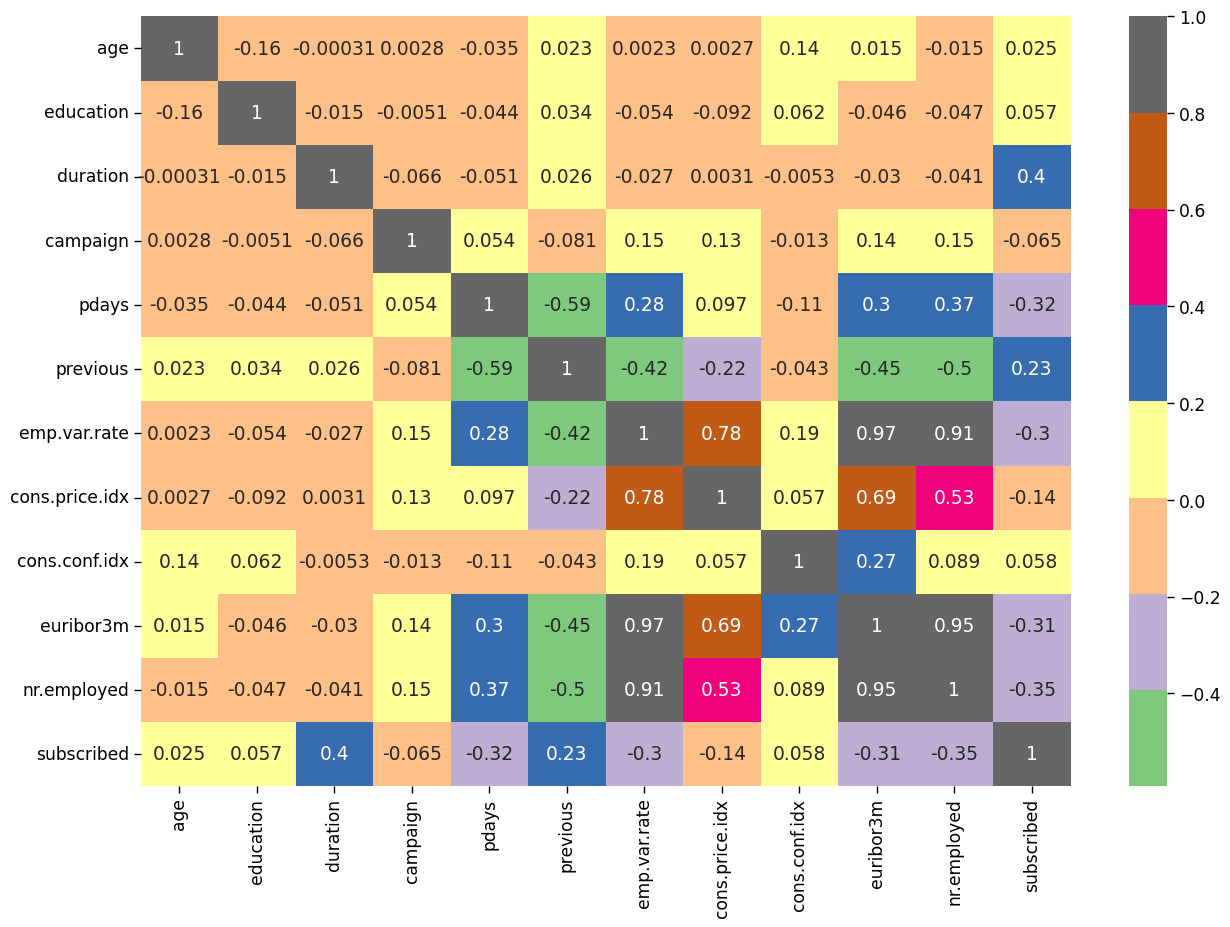

In [30]:
plt.figure(figsize=(15,10))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(bank_corr, annot=True, cmap='Accent')

In [31]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed      -0.351258
pdays            -0.320820
euribor3m        -0.306341
emp.var.rate     -0.300278
cons.price.idx   -0.143725
campaign         -0.065436
age               0.024988
education         0.057166
cons.conf.idx     0.057937
previous          0.229887
duration          0.399974
subscribed        1.000000
Name: subscribed, dtype: float64

In [32]:
bankData = pd.get_dummies(bankData, columns = ['job','marital','housing','loan','contact','month','day_of_week','poutcome'])

In [33]:
bank_corr = bankData.corr()

In [34]:
bank_corr['subscribed'].sort_values(ascending=True)

nr.employed            -0.351258
pdays                  -0.320820
euribor3m              -0.306341
emp.var.rate           -0.300278
poutcome_nonexistent   -0.193821
cons.price.idx         -0.143725
contact_telephone      -0.142108
month_may              -0.107764
job_blue-collar        -0.075260
campaign               -0.065436
marital_married        -0.043691
month_jul              -0.033678
job_services           -0.029101
day_of_week_mon        -0.024767
job_entrepreneur       -0.016961
month_aug              -0.016487
marital_divorced       -0.016435
job_housemaid          -0.010019
month_nov              -0.008758
day_of_week_fri        -0.006262
housing_no             -0.006018
job_technician         -0.004787
job_self-employed      -0.003484
month_jun              -0.003293
loan_yes               -0.002567
day_of_week_wed         0.000191
job_management          0.001061
loan_no                 0.002567
housing_yes             0.006018
day_of_week_tue         0.011728
job_unempl

# Random Forest

In [35]:
from sklearn.model_selection import train_test_split
seed_num = 0 # random_state is set to a value for reproducible output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=seed_num) # 70 30 udh perfect tp tar di report coba cobain bnyk percentage

print(X_train.shape)
print(X_test.shape)

(18452, 49)
(7908, 49)


In [36]:
    from sklearn.ensemble import RandomForestClassifier

# Construct a random forest classifier.
clf_rt = RandomForestClassifier(n_estimators = 50, oob_score=True)
clf_rt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True)

In [37]:
# We can print the classifier like this.
print(clf_rt)

# The feature impartances can be accessed
print("Feature importances are:", clf_rt.feature_importances_)

# oob score
print("oob score is {:.3f}".format(clf_rt.oob_score_))

# Let's look at one specific prediction.
test_idx = 20
test_point = X_test[test_idx]

pred_test = clf_rt.predict([test_point])
pred_test_probs = clf_rt.predict_proba([test_point])

print("Testing point", test_idx, "; predicted as", pred_test[0],
      "; actually", y_test.iloc[test_idx], "; probabilities", pred_test_probs[0])

RandomForestClassifier(n_estimators=50, oob_score=True)
Feature importances are: [0.01267394 0.00889078 0.00398469 0.00313516 0.00667554 0.00568518
 0.00393365 0.00703817 0.00521098 0.01093389 0.00401204 0.00690689
 0.01164041 0.01031868 0.01268236 0.01336212 0.00921565 0.00848842
 0.00779004 0.00671983 0.00290359 0.00310978 0.00089412 0.00271129
 0.00325961 0.00442656 0.00356644 0.00253353 0.00496096 0.00184909
 0.01062808 0.01197735 0.01118019 0.01092266 0.01118668 0.00648588
 0.00713445 0.02217948 0.08296715 0.03625838 0.29490528 0.04038598
 0.02668207 0.00984599 0.02403625 0.03028497 0.02234411 0.09388337
 0.05719828]
oob score is 0.911
Testing point 20 ; predicted as 0 ; actually 0 ; probabilities [0.82 0.18]


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
y_pred = clf_rt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9113555892766818
[[6791  224]
 [ 477  416]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7015
           1       0.65      0.47      0.54       893

    accuracy                           0.91      7908
   macro avg       0.79      0.72      0.75      7908
weighted avg       0.90      0.91      0.90      7908



# Parameter Tunning

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators' : [100,200,300,500],
   'max_depth': [2,4,8,16,32,48,'None'],
   'criterion' :['gini','entropy'],
   'max_features' : ['log2', 'sqrt'],
   'min_samples_leaf' : [1,2,5]
  }
]
RT = RandomForestClassifier() # default weight = uniform
clf_rt = GridSearchCV(RT, param_grid, cv=5, scoring='accuracy',n_jobs =-1, return_train_score=False) # if scoring = 'f1', it would count the f1 score
clf_rt.fit(X_train, y_train);

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


240 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\alexa\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\alexa\anaconda3\lib\site-packag

In [40]:
pd.DataFrame(clf_rt.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.263808      0.067151         0.100965        0.012097   
1         3.206219      0.878725         0.180449        0.058150   
2         4.837154      0.884280         0.254791        0.015348   
3         6.555129      0.625064         0.378113        0.031272   
4         1.568281      0.222607         0.096557        0.024488   
..             ...           ...              ...             ...   
331       0.291307      0.009556         0.000000        0.000000   
332       0.072333      0.009161         0.000000        0.000000   
333       0.128197      0.008016         0.000000        0.000000   
334       0.184924      0.010622         0.000000        0.000000   
335       0.275979      0.007815         0.000000        0.000000   

    param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0              gini               2               log2                      1   
1              gini               2               log2                      1   
2              gini               2               log2                      1   
3              gini               2               log2                      1   
4              gini               2               log2                      2   
..              ...             ...                ...                    ...   
331         entropy            None               sqrt                      2   
332         entropy            None               sqrt                      5   
333         entropy            None               sqrt                      5   
334         entropy            None               sqrt                      5   
335         entropy            None               sqrt                      5   

    param_n_estimators                                             params  \
0                  100  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
1                  200  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
2                  300  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
3                  500  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
4                  100  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
..                 ...                                                ...   
331                500  {'criterion': 'entropy', 'max_depth': 'None', ...   
332                100  {'criterion': 'entropy', 'max_depth': 'None', ...   
333                200  {'criterion': 'entropy', 'max_depth': 'None', ...   
334                300  {'criterion': 'entropy', 'max_depth': 'None', ...   
335                500  {'criterion': 'entropy', 'max_depth': 'None', ...   

     split0_test_score  split1_test_score  split2_test_score  \
0             0.887564           0.887835           0.887805   
1             0.887564           0.888106           0.887805   
2             0.887835           0.887835           0.887805   
3             0.887564           0.887835           0.887805   
4             0.887564           0.888919           0.887805   
..                 ...                ...                ...   
331                NaN                NaN                NaN   
332                NaN                NaN                NaN   
333                NaN                NaN                NaN   
334                NaN                NaN                NaN   
335                NaN                NaN                NaN   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0             0.887805           0.887805         0.887763        0.000100   
1             0.887805           0.887805         0.887817        0.000172   
2             0.887805           0.887805         0.887817        0.000015   
3             0.887805           0.887805         0.887763        0.000100   
4             0.887805           0.887805         0.887980        0.000479   
..                 ...                ...

In [41]:
clf_rt.best_params_

{'criterion': 'gini',
 'max_depth': 48,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_rt.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9123672230652504
[[6803  212]
 [ 481  412]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7015
           1       0.66      0.46      0.54       893

    accuracy                           0.91      7908
   macro avg       0.80      0.72      0.75      7908
weighted avg       0.90      0.91      0.91      7908



In [43]:
features = ['job_admin','job_blue-collar','job_entrepreneur','job_housemaid'
            ,'job_management','job_retired','job_self-employed','job_services'
            ,'job_student','job_technician','job_unemployed','marital_divorced'
            ,'marital_married','marital_single','housing_no','housing_yes'
            ,'loan_no','loan_yes','contact_cellular','contact_telephone'
           ,'month_apr','month_aug','month_dec','month_jul'
            ,'month_jun','month_mar','month_may','month_nov'
           ,'month_oct','month_sep','day_of_week_fri','day_of_week_mon'
            ,'day_of_week_thu','day_of_week_tue','day_of_week_wed','poutcome_failure'
            ,'poutcome_nonexistent','poutcome_success','age','education'
            ,'duration','campaign','pdays','previous',
            'emp.var.rate','cons.price.idx','cons.conf.idx','euribor'
            ,'nr.employed']

In [44]:
fi = clf_rt.best_estimator_.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

job_admin........... 0.01050774953455454
job_blue-collar..... 0.00645341793048427
job_entrepreneur.... 0.002318177016409785
job_housemaid....... 0.0014189158016323536
job_management...... 0.00451725247397016
job_retired......... 0.004180721410635016
job_self-employed... 0.002404134236308593
job_services........ 0.004256678726001705
job_student......... 0.0037567659682882187
job_technician...... 0.00874647739736118
job_unemployed...... 0.0022564050130120814
marital_divorced.... 0.004589182592742213
marital_married..... 0.00995287046976104
marital_single...... 0.00903728868337068
housing_no.......... 0.010460020712667542
housing_yes......... 0.010508227409038732
loan_no............. 0.006310353487962845
loan_yes............ 0.006260452038009462
contact_cellular.... 0.007011039366942072
contact_telephone... 0.00699805712640882
month_apr........... 0.0036737555580426138
month_aug........... 0.0028816314459099352
month_dec........... 0.0009386576353624842
month_jul........... 0.002894313408

The AUC is 0.947
Threshold	TPR vs FPR
1.945	0.000 vs 0.000
0.945	0.001 vs 0.000
0.900	0.018 vs 0.000
0.898	0.018 vs 0.000
0.896	0.019 vs 0.000
0.894	0.019 vs 0.000
0.889	0.021 vs 0.000
0.889	0.021 vs 0.001
0.873	0.027 vs 0.001
0.865	0.027 vs 0.001
0.857	0.032 vs 0.001
0.856	0.032 vs 0.001
0.848	0.038 vs 0.001
0.847	0.038 vs 0.001
0.830	0.049 vs 0.001
0.829	0.049 vs 0.001
0.818	0.059 vs 0.001
0.818	0.059 vs 0.001
0.808	0.068 vs 0.001
0.808	0.068 vs 0.001
0.806	0.074 vs 0.001
0.806	0.074 vs 0.002
0.804	0.075 vs 0.002
0.802	0.075 vs 0.002
0.802	0.076 vs 0.002
0.799	0.076 vs 0.002
0.792	0.083 vs 0.002
0.792	0.083 vs 0.002
0.791	0.084 vs 0.002
0.789	0.084 vs 0.002
0.781	0.087 vs 0.002
0.780	0.087 vs 0.002
0.776	0.092 vs 0.002
0.774	0.092 vs 0.003
0.762	0.100 vs 0.003
0.760	0.100 vs 0.003
0.758	0.102 vs 0.003
0.756	0.102 vs 0.003
0.754	0.104 vs 0.003
0.753	0.104 vs 0.003
0.751	0.109 vs 0.003
0.751	0.109 vs 0.003
0.741	0.118 vs 0.003
0.740	0.118 vs 0.003
0.727	0.132 vs 0.003
0.726	0.132 vs 0.

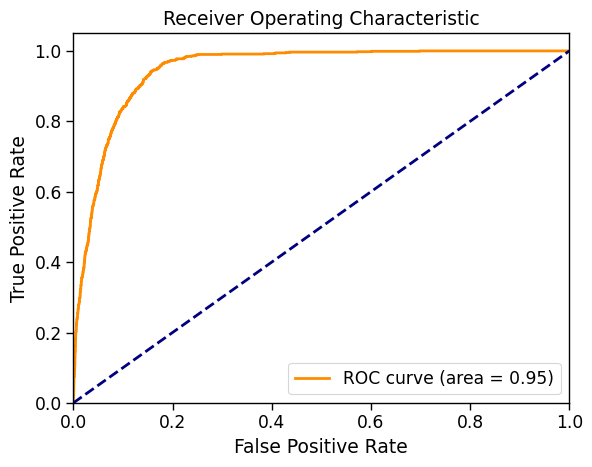

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_rt.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# RT with Feature Selection

In [46]:
seed_num = 0

X2 = bankData[['duration', 'nr.employed','poutcome_success','euribor3m','cons.conf.idx']]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3,random_state=seed_num) 

print(X_train.shape)
print(X_test.shape)

(18452, 5)
(7908, 5)


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators' : [100,200,300,500],
   'max_depth': [2,4,8,16,32,48,'None'],
   'criterion' :['gini','entropy'],
   'max_features' : ['log2', 'sqrt'],
   'min_samples_leaf' : [1,2,5]
  }
]
RT = RandomForestClassifier() # default weight = uniform
clf_rt2 = GridSearchCV(RT, param_grid, cv=5, scoring='accuracy',n_jobs = -1, return_train_score=False) # if scoring = 'f1', it would count the f1 score
clf_rt2.fit(X_train, y_train);

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


240 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\alexa\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\alexa\anaconda3\lib\site-packag

In [48]:
clf_rt2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
y_pred = clf_rt2.predict(X_test)
print ("Accuracy : " )
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy : 
0.9142640364188164
[[6763  252]
 [ 426  467]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7015
           1       0.65      0.52      0.58       893

    accuracy                           0.91      7908
   macro avg       0.80      0.74      0.77      7908
weighted avg       0.91      0.91      0.91      7908



The AUC is 0.947
Threshold	TPR vs FPR
1.941	0.000 vs 0.000
0.941	0.001 vs 0.000
0.894	0.013 vs 0.000
0.892	0.013 vs 0.000
0.890	0.015 vs 0.000
0.888	0.015 vs 0.001
0.861	0.038 vs 0.001
0.858	0.038 vs 0.001
0.854	0.043 vs 0.001
0.850	0.043 vs 0.001
0.848	0.046 vs 0.001
0.848	0.046 vs 0.001
0.847	0.048 vs 0.001
0.841	0.048 vs 0.001
0.836	0.055 vs 0.001
0.833	0.055 vs 0.002
0.826	0.064 vs 0.002
0.825	0.064 vs 0.002
0.823	0.067 vs 0.002
0.823	0.067 vs 0.002
0.816	0.074 vs 0.002
0.816	0.074 vs 0.002
0.814	0.076 vs 0.002
0.812	0.076 vs 0.002
0.800	0.091 vs 0.002
0.800	0.091 vs 0.002
0.785	0.103 vs 0.002
0.784	0.103 vs 0.002
0.769	0.116 vs 0.002
0.768	0.116 vs 0.003
0.767	0.120 vs 0.003
0.765	0.120 vs 0.003
0.757	0.137 vs 0.003
0.756	0.137 vs 0.003
0.754	0.141 vs 0.003
0.752	0.141 vs 0.003
0.749	0.147 vs 0.003
0.748	0.147 vs 0.004
0.744	0.155 vs 0.004
0.744	0.155 vs 0.004
0.740	0.158 vs 0.004
0.740	0.160 vs 0.004
0.739	0.161 vs 0.004
0.737	0.161 vs 0.004
0.734	0.165 vs 0.004
0.734	0.165 vs 0.

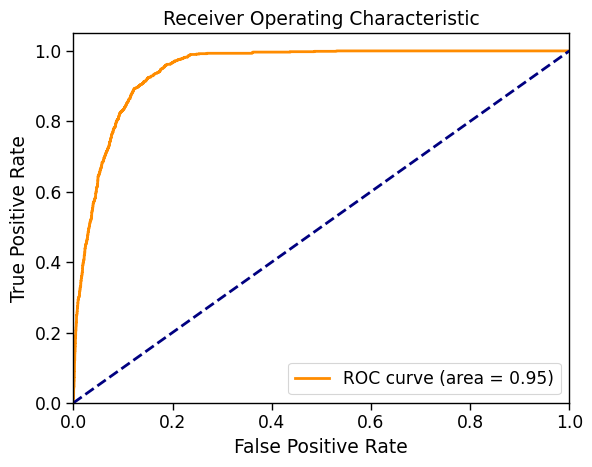

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = clf_rt2.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# submit

In [51]:
testData = pd.read_csv("Assignment3-Unknown-Dataset.csv")

In [52]:
testData.replace(['unknown'], pd.NA, inplace=True)

In [53]:
testData.drop(['default'],axis=1, inplace=True)
missing_categorical = ['job','marital','education','housing','loan']

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= pd.NA , strategy='most_frequent')
testData[missing_categorical] = imputer.fit_transform(testData[missing_categorical])
testData

row ID  age          job  marital            education housing loan  \
0        Row0   57     services  married          high.school      no   no   
1        Row1   40       admin.  married             basic.6y      no   no   
2        Row2   41  blue-collar  married    university.degree      no   no   
3        Row3   50  blue-collar  married             basic.9y     yes  yes   
4        Row4   39   management   single             basic.9y      no   no   
...       ...  ...          ...      ...                  ...     ...  ...   
6585  Row6585   41   technician  married  professional.course     yes   no   
6586  Row6586   60  blue-collar  married             basic.4y     yes   no   
6587  Row6587   31       admin.   single    university.degree     yes   no   
6588  Row6588   62      retired  married    university.degree     yes   no   
6589  Row6589   62      retired  married    university.degree      no   no   

        contact month day_of_week  duration  campaign  pdays  previous  \
0     telephone   may         mon       149         1    999         0   
1     telephone   may         mon       151         1    999         0   
2     telephone   may         mon        55         1    999         0   
3     telephone   may         mon       353         1    999         0   
4     telephone   may         mon       195         1    999         0   
...         ...   ...         ...       ...       ...    ...       ...   
6585   cellular   nov         mon       185         2    999         0   
6586   cellular   nov         tue       347         2      4         1   
6587   cellular   nov         thu       353         1    999         0   
6588   cellular   nov         thu       208         1      1         6   
6589   cellular   nov         thu       483         2      6         3   

         poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0     nonexistent           1.1          93.994          -36.4      4.857   
1     nonexistent           1.1          93.994          -36.4      4.857   
2     nonexistent           1.1          93.994          -36.4      4.857   
3     nonexistent           1.1          93.994          -36.4      4.857   
4     nonexistent           1.1          93.994          -36.4      4.857   
...           ...           ...             ...            ...        ...   
6585  nonexistent          -1.1          94.767          -50.8      1.039   
6586      success          -1.1          94.767          -50.8      1.035   
6587  nonexistent          -1.1          94.767          -50.8      1.031   
6588      success          -1.1          94.767          -50.8      1.031   
6589      success          -1.1          94.767          -50.8      1.031   

      nr.employed  
0          5191.0  
1          5191.0  
2          5191.0  
3          5191.0  
4          5191.0  
...           ...  
6585       4963.6  
6586       4963.6  
6587       4963.6  
6588       4963.6  
6589       4963.6  

[6590 rows x 20 columns]

In [55]:
testData = testData.drop('row ID', axis=1)
testData

age          job  marital            education housing loan    contact  \
0      57     services  married          high.school      no   no  telephone   
1      40       admin.  married             basic.6y      no   no  telephone   
2      41  blue-collar  married    university.degree      no   no  telephone   
3      50  blue-collar  married             basic.9y     yes  yes  telephone   
4      39   management   single             basic.9y      no   no  telephone   
...   ...          ...      ...                  ...     ...  ...        ...   
6585   41   technician  married  professional.course     yes   no   cellular   
6586   60  blue-collar  married             basic.4y     yes   no   cellular   
6587   31       admin.   single    university.degree     yes   no   cellular   
6588   62      retired  married    university.degree     yes   no   cellular   
6589   62      retired  married    university.degree      no   no   cellular   

     month day_of_week  duration  campaign  pdays  previous     poutcome  \
0      may         mon       149         1    999         0  nonexistent   
1      may         mon       151         1    999         0  nonexistent   
2      may         mon        55         1    999         0  nonexistent   
3      may         mon       353         1    999         0  nonexistent   
4      may         mon       195         1    999         0  nonexistent   
...    ...         ...       ...       ...    ...       ...          ...   
6585   nov         mon       185         2    999         0  nonexistent   
6586   nov         tue       347         2      4         1      success   
6587   nov         thu       353         1    999         0  nonexistent   
6588   nov         thu       208         1      1         6      success   
6589   nov         thu       483         2      6         3      success   

      emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0              1.1          93.994          -36.4      4.857       5191.0  
1              1.1          93.994          -36.4      4.857       5191.0  
2              1.1          93.994          -36.4      4.857       5191.0  
3              1.1          93.994          -36.4      4.857       5191.0  
4              1.1          93.994          -36.4      4.857       5191.0  
...            ...             ...            ...        ...          ...  
6585          -1.1          94.767          -50.8      1.039       4963.6  
6586          -1.1          94.767          -50.8      1.035       4963.6  
6587          -1.1          94.767          -50.8      1.031       4963.6  
6588          -1.1          94.767          -50.8      1.031       4963.6  
6589          -1.1          94.767          -50.8      1.031       4963.6  

[6590 rows x 19 columns]

In [56]:
scale_mapper = {"illiterate":0, "basic.4y":1, "basic.6y":2 ,"basic.9y":3,
               "high.school":4,"professional.course":5,"university.degree":6}
testData["education"] = testData["education"].replace(scale_mapper)

In [57]:
X = testData

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,4,5,6,7,8,13])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Model Normal

In [59]:
y_pred = clf_rt.predict(X)

In [60]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [61]:
emptyPred.head()

row ID  prediction-subscribed
0   Row0                      0
1   Row1                      0
2   Row2                      0
3   Row3                      0
4   Row4                      0

In [62]:
emptyPred['prediction-subscribed'] = y_pred

In [63]:
emptyPred.to_csv("RandomForest.csv")

# Model FS

In [64]:
testData = pd.get_dummies(testData, columns = ['job','marital','housing','loan','contact','month','day_of_week','poutcome'])

In [65]:
X = testData[['duration', 'nr.employed','poutcome_success','euribor3m','cons.conf.idx']]

In [66]:
X.to_numpy()

array([[ 1.4900e+02,  5.1910e+03,  0.0000e+00,  4.8570e+00, -3.6400e+01],
       [ 1.5100e+02,  5.1910e+03,  0.0000e+00,  4.8570e+00, -3.6400e+01],
       [ 5.5000e+01,  5.1910e+03,  0.0000e+00,  4.8570e+00, -3.6400e+01],
       ...,
       [ 3.5300e+02,  4.9636e+03,  0.0000e+00,  1.0310e+00, -5.0800e+01],
       [ 2.0800e+02,  4.9636e+03,  1.0000e+00,  1.0310e+00, -5.0800e+01],
       [ 4.8300e+02,  4.9636e+03,  1.0000e+00,  1.0310e+00, -5.0800e+01]])

In [67]:
y_pred = clf_rt2.predict(X)

In [68]:
emptyPred = pd.read_csv("Assignment3-Kaggle-Submission-Sample.csv")

In [69]:
emptyPred['prediction-subscribed'] = y_pred

In [70]:
emptyPred.to_csv("RandomForest-FS.csv")